In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,roc_auc_score,precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,plot_roc_curve,roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import warnings 
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\HealthcareAnalytics_train.csv')

In [3]:
df.shape

(318438, 18)

In [34]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

## EDA

<AxesSubplot:>

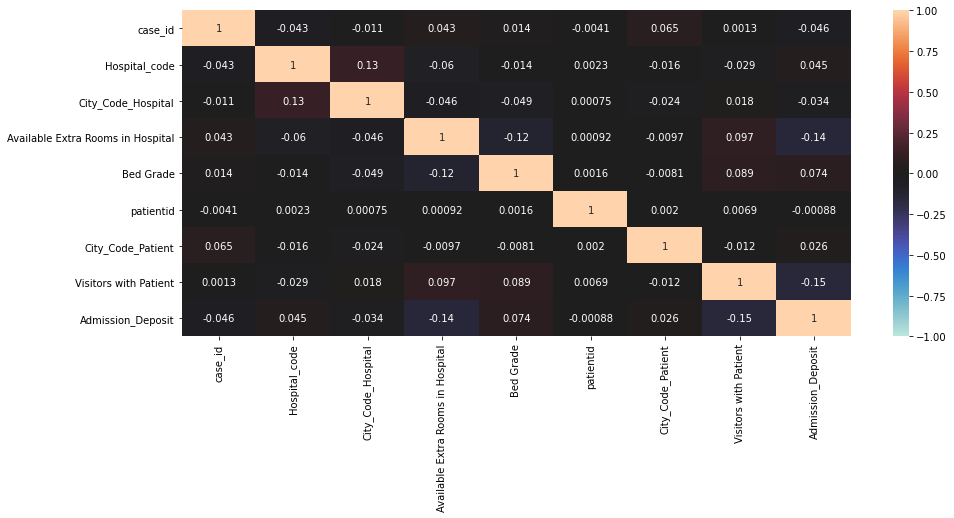

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [28]:

df['Hospital_code'].nunique()

32

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Hospital_code', ylabel='count'>

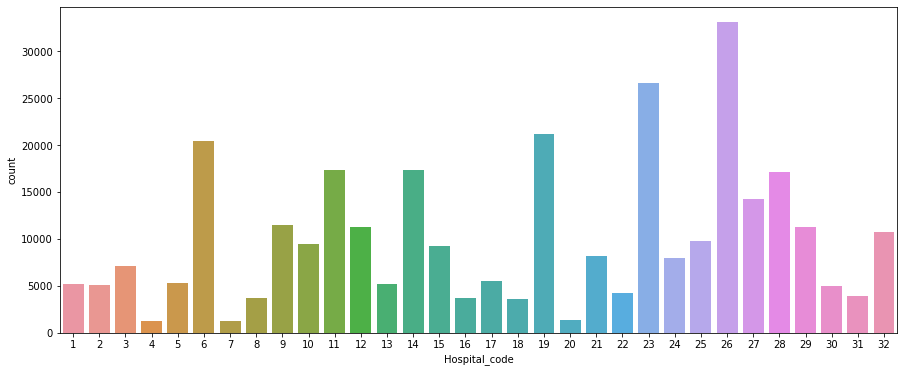

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(df['Hospital_code'])

Hospital Code 26 has high number of patients

<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

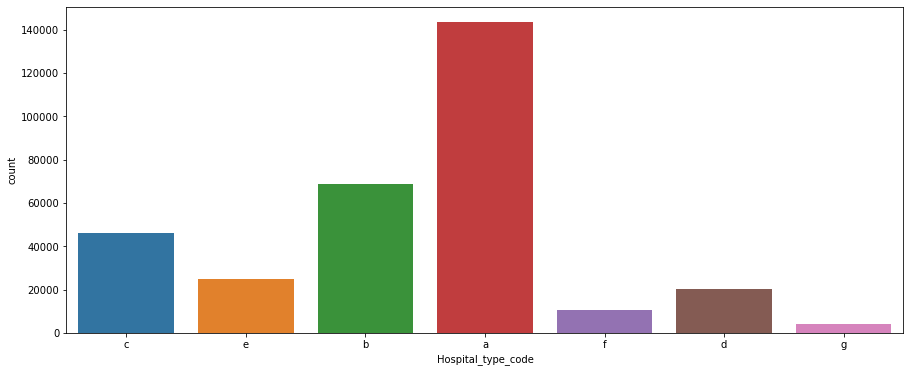

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Hospital_type_code'])

<AxesSubplot:xlabel='Hospital_region_code', ylabel='count'>

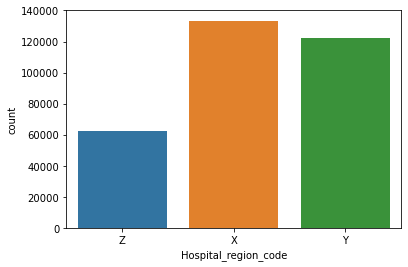

In [37]:
sns.countplot('Hospital_region_code',data=df)

Region X has more number of patients admitted

<AxesSubplot:xlabel='Hospital_code', ylabel='Available Extra Rooms in Hospital'>

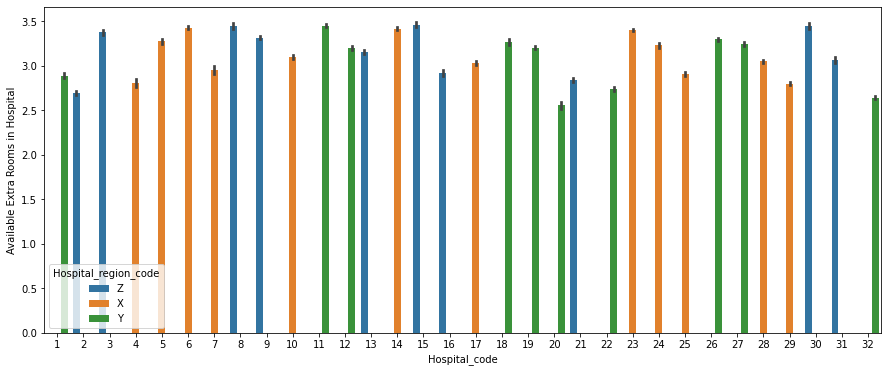

In [39]:
plt.figure(figsize=(15,6))
sns.barplot('Hospital_code','Available Extra Rooms in Hospital',hue='Hospital_region_code',data=df)

Almost Every Hospital has atleast 2 rooms across all regions

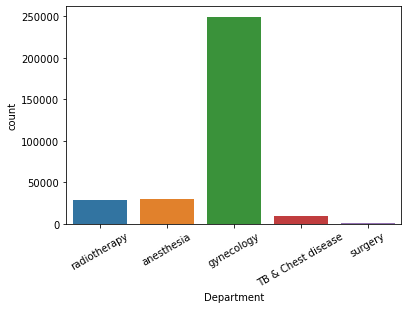

In [46]:
sns.countplot('Department',data=df)
plt.xticks(rotation=30)
plt.show()

Gynecology Department has most number of cases which means more number of patients are women

<AxesSubplot:xlabel='Hospital_code', ylabel='count'>

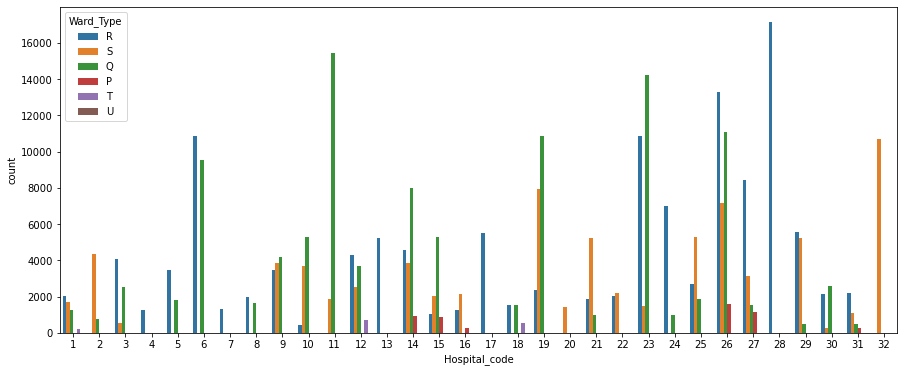

In [48]:
plt.figure(figsize=(15,6))
sns.countplot('Hospital_code',hue='Ward_Type',data=df)

Ward Type R, Q types  are mostly available in the Hospitals

<AxesSubplot:xlabel='Hospital_code', ylabel='Ward_Type'>

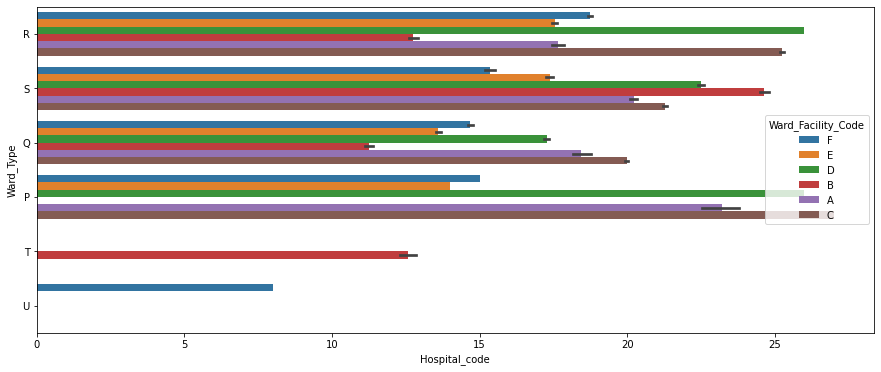

In [56]:
plt.figure(figsize=(15,6))
sns.barplot('Hospital_code','Ward_Type',hue='Ward_Facility_Code',data=df)

<AxesSubplot:xlabel='Ward_Type', ylabel='Bed Grade'>

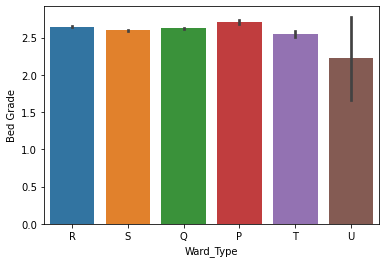

In [58]:
sns.barplot('Ward_Type','Bed Grade',data=df)

Except ward type U every hospital has good Bed Grade Type

In [59]:
df['patientid'].nunique()

92017

<AxesSubplot:xlabel='City_Code_Patient', ylabel='count'>

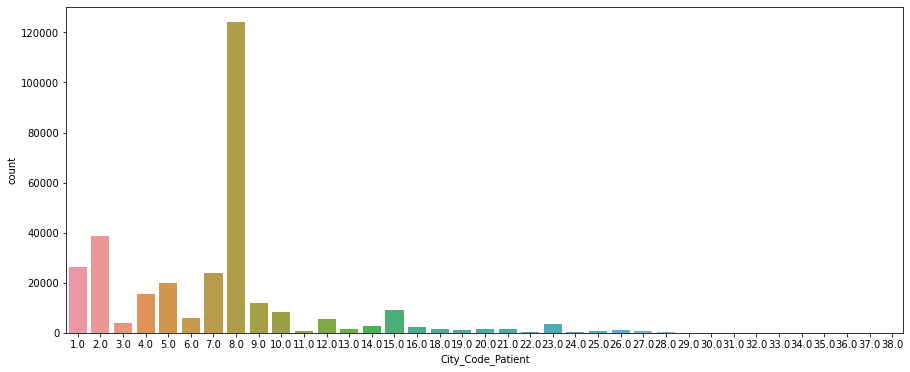

In [61]:
plt.figure(figsize=(15,6))
sns.countplot('City_Code_Patient',data=df)

The City code 8 has more number of Patients

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Type of Admission'>

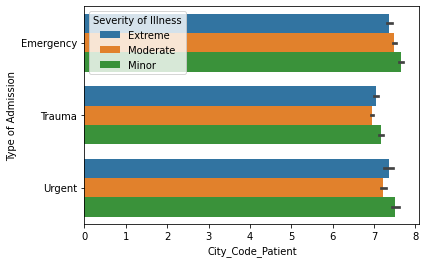

In [64]:
sns.barplot('City_Code_Patient','Type of Admission',data=df,hue='Severity of Illness')

<AxesSubplot:xlabel='Age', ylabel='count'>

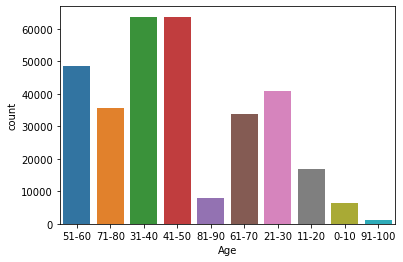

In [70]:
sns.countplot('Age',data=df)

Age 31-50 are visiting the hospitals high as we also saw the patients vising Gynecologist is high

In [71]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [72]:
df['Stay']=df['Stay'].astype('category')
df['Stay']=df['Stay'].cat.codes

In [73]:
df['Stay'].unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9], dtype=int8)

<AxesSubplot:xlabel='Stay', ylabel='count'>

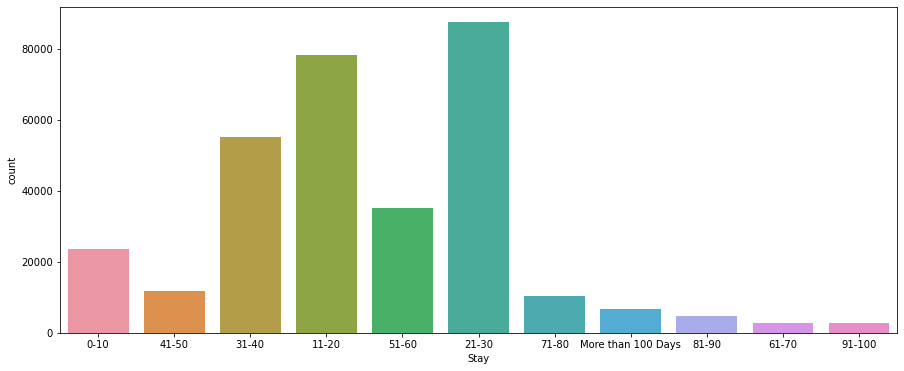

In [81]:
plt.figure(figsize=(15,6))
sns.countplot(df['Stay'])

Most of the people stay in hospital for 21 to 30 days

<AxesSubplot:xlabel='Type of Admission', ylabel='Stay'>

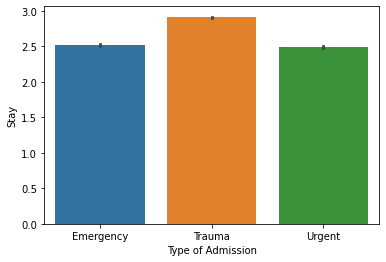

In [75]:
sns.barplot('Type of Admission','Stay',data=df)

Trauma patients are staying more in hospital due to criticality

<AxesSubplot:xlabel='Type of Admission', ylabel='Stay'>

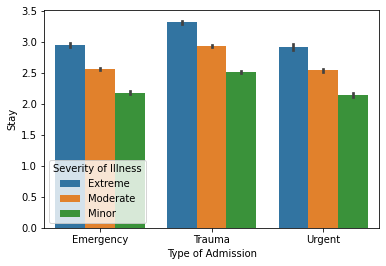

In [77]:
sns.barplot('Type of Admission','Stay',data=df,hue='Severity of Illness')

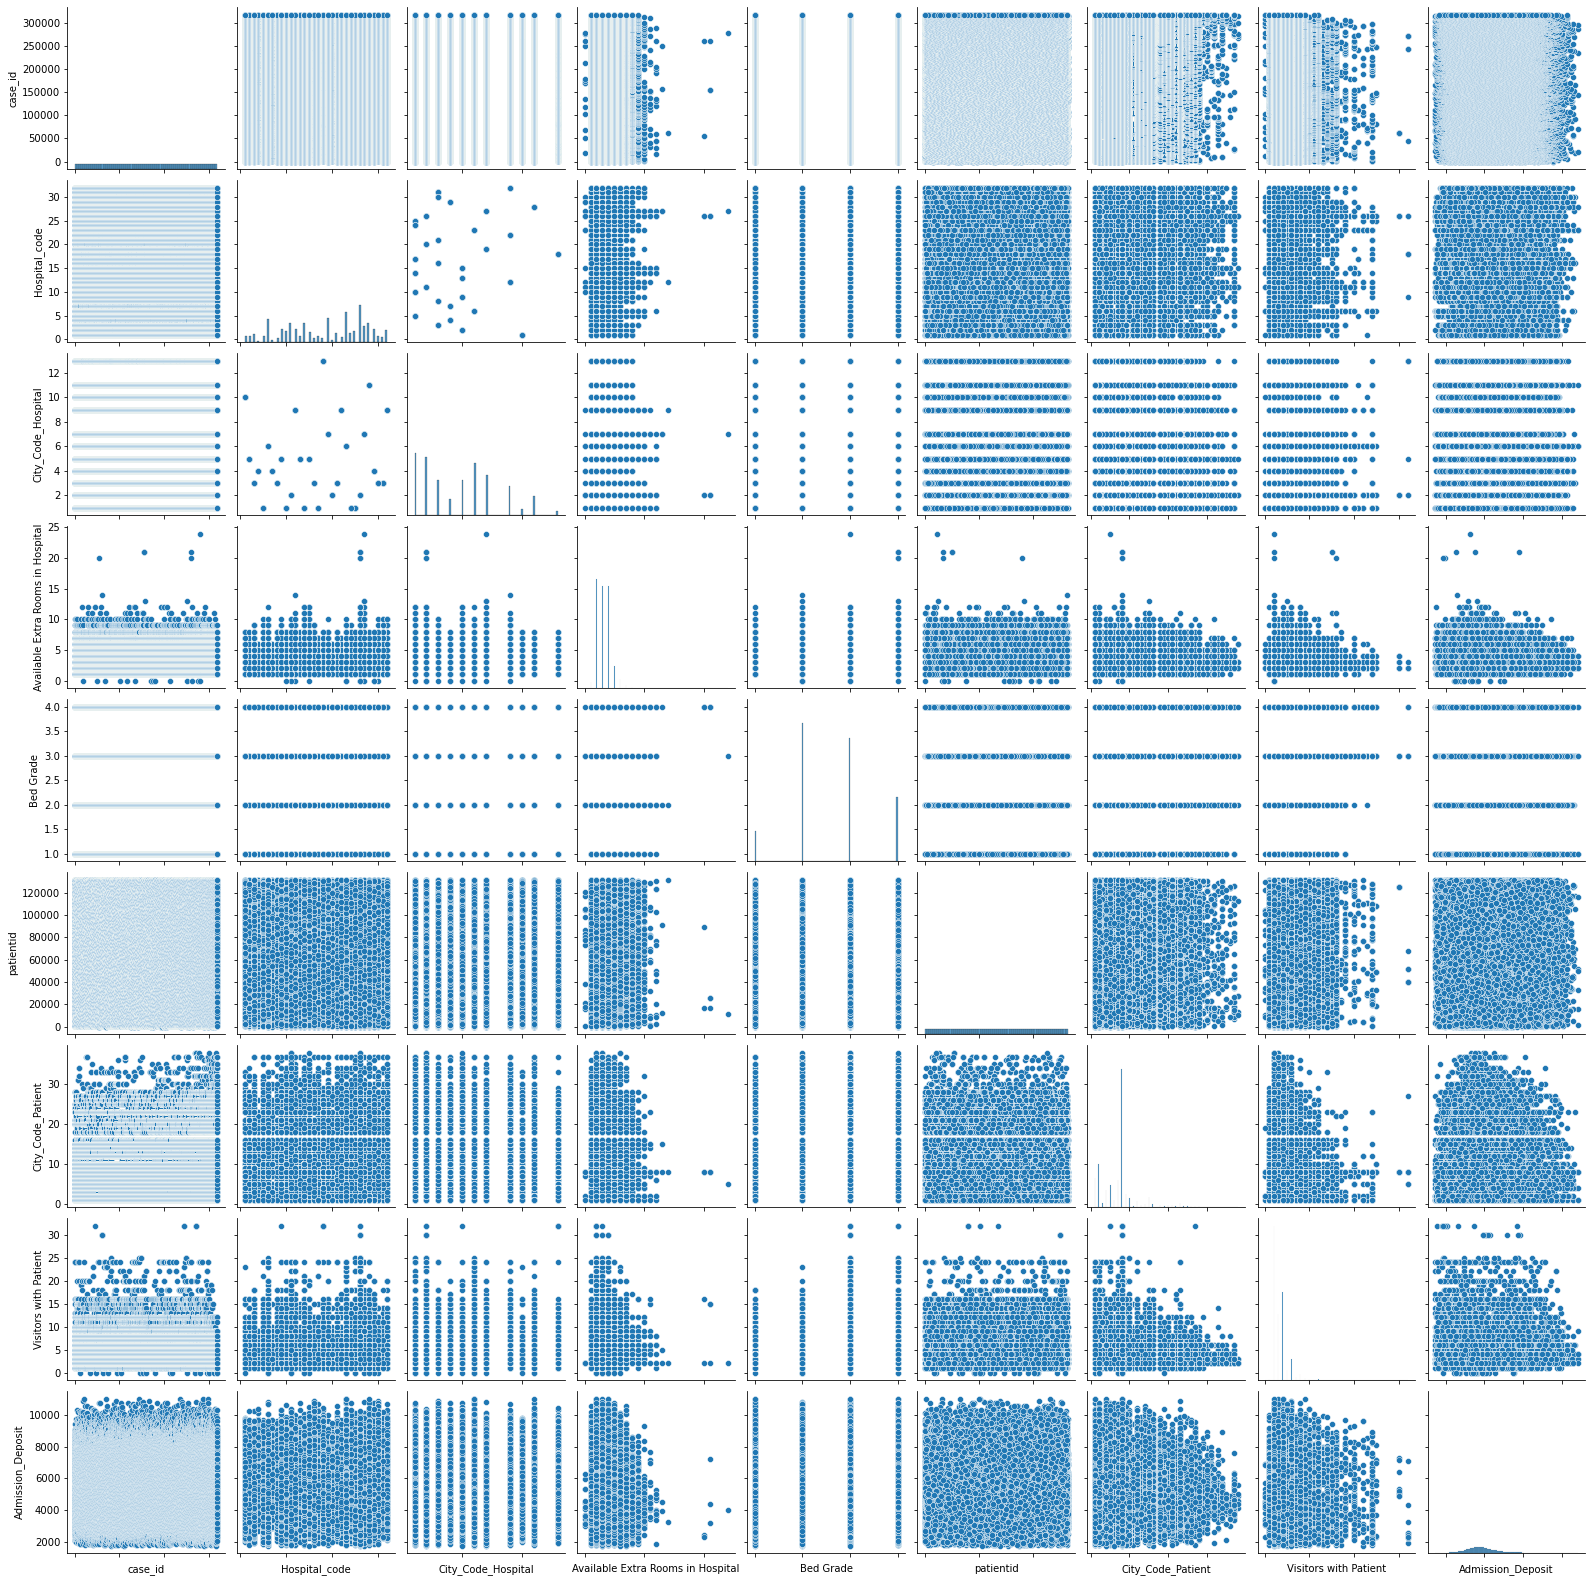

In [82]:
g = sns.pairplot(df)
g.set(xticklabels = [])

## PREPROCESSING

In [72]:
df1=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\HealthcareAnalytics_train.csv')
df2=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\test.csv')
df1['Source']='train'
df2['Source']='test'
df=pd.concat([df1,df2],axis=0)

In [73]:
df.shape

(455495, 19)

In [74]:
dict1={'Available Extra Rooms in Hospital':'Available_rooms',
      'Type of Admission':'Admission_Type',
      'Severity of Illness':'Severity_of_Illness',
      'Visitors with Patient':'Visitors',
      'Bed Grade':'Bed_grade'}
df.rename(dict1,inplace=True,axis=1)

In [75]:
df.isna().sum()

case_id                      0
Hospital_code                0
Hospital_type_code           0
City_Code_Hospital           0
Hospital_region_code         0
Available_rooms              0
Department                   0
Ward_Type                    0
Ward_Facility_Code           0
Bed_grade                  148
patientid                    0
City_Code_Patient         6689
Admission_Type               0
Severity_of_Illness          0
Visitors                     0
Age                          0
Admission_Deposit            0
Stay                    137057
Source                       0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_id               455495 non-null  int64  
 1   Hospital_code         455495 non-null  int64  
 2   Hospital_type_code    455495 non-null  object 
 3   City_Code_Hospital    455495 non-null  int64  
 4   Hospital_region_code  455495 non-null  object 
 5   Available_rooms       455495 non-null  int64  
 6   Department            455495 non-null  object 
 7   Ward_Type             455495 non-null  object 
 8   Ward_Facility_Code    455495 non-null  object 
 9   Bed_grade             455347 non-null  float64
 10  patientid             455495 non-null  int64  
 11  City_Code_Patient     448806 non-null  float64
 12  Admission_Type        455495 non-null  object 
 13  Severity_of_Illness   455495 non-null  object 
 14  Visitors              455495 non-null  int64  
 15  

In [19]:
df['Bed_grade'].value_counts()

2.0    176451
3.0    158942
4.0     82387
1.0     37567
Name: Bed_grade, dtype: int64

In [77]:
df['Bed_grade'].mode()
df.fillna(df['Bed_grade'].mode()[0],inplace=True)

In [78]:
df['Bed_grade'].isna().sum()

0

In [79]:
df['City_Code_Patient'].mode()
df.fillna(df['City_Code_Patient'].mode()[0],inplace=True)

In [23]:
df['Stay']=df['Stay'].astype(str)
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100', '2.0'],
      dtype=object)

In [24]:
lb=LabelEncoder()
df['Stay']=lb.fit_transform(df['Stay'])

In [25]:
df['Stay'].unique()

array([ 0,  5,  4,  1,  6,  3,  8, 11,  9,  7, 10,  2])

In [26]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_rooms', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed_grade', 'patientid', 'City_Code_Patient',
       'Admission_Type', 'Severity_of_Illness', 'Visitors', 'Age',
       'Admission_Deposit', 'Stay', 'Source'],
      dtype='object')

In [27]:
def preprocess(df):
    cat1=pd.get_dummies(df['Hospital_code'],prefix='Hospital_code')
    cat2=pd.get_dummies(df['Hospital_type_code'],prefix='Hospital_type_code')
    cat4=pd.get_dummies(df['City_Code_Hospital'],prefix='City_Code_Hospital')
    cat5=pd.get_dummies(df['Hospital_region_code'],prefix='Hospital_region_code')
    cat6=pd.get_dummies(df['Department'],prefix='Department')
    cat7=pd.get_dummies(df['Ward_Type'],prefix='Ward_Type')
    cat8=pd.get_dummies(df['Ward_Facility_Code'],prefix='Ward_Facility_Code')
    cat9=pd.get_dummies(df['Admission_Type'],prefix='Admission_Type')
    cat10=pd.get_dummies(df['City_Code_Patient'],prefix='City_Code_Patient')
    cat11=pd.get_dummies(df['Age'],prefix='Age')
    cat12=pd.get_dummies(df['Bed_grade'],'Bed_Grade')
    df_final=pd.concat([cat1,cat2,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,df],axis=1)
    df_final.drop(columns=['case_id','Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_rooms', 'Department', 'Ward_Type',
       'Ward_Facility_Code','patientid','Bed_grade','City_Code_Patient',
       'Admission_Type', 'Severity_of_Illness','Age'],axis=1,inplace=True)
    return df_final

In [28]:
df_preprocessed=preprocess(df)

In [29]:
df_preprocessed.shape

(455495, 124)

In [30]:
df_preprocessed.columns

Index(['Hospital_code_1', 'Hospital_code_2', 'Hospital_code_3',
       'Hospital_code_4', 'Hospital_code_5', 'Hospital_code_6',
       'Hospital_code_7', 'Hospital_code_8', 'Hospital_code_9',
       'Hospital_code_10',
       ...
       'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90',
       'Age_91-100', 'Visitors', 'Admission_Deposit', 'Stay', 'Source'],
      dtype='object', length=124)

In [31]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Columns: 124 entries, Hospital_code_1 to Source
dtypes: float64(1), int32(1), int64(1), object(1), uint8(120)
memory usage: 67.8+ MB


In [32]:
train_preprocess=df_preprocessed[df_preprocessed['Source']=='train']
test_preprocess=df_preprocessed[df_preprocessed['Source']=='test']

In [33]:
train_preprocess.drop(columns=['Source'],axis=1,inplace=True)
test_preprocess.drop(columns=['Source'],axis=1,inplace=True)

In [34]:
train_x=train_preprocess.drop('Stay',1)
train_y=train_preprocess['Stay']
test_x=test_preprocess.drop('Stay',1)
test_y=test_preprocess['Stay']

In [35]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Columns: 122 entries, Hospital_code_1 to Admission_Deposit
dtypes: float64(1), int64(1), uint8(120)
memory usage: 43.7 MB


In [36]:
train_x.shape,test_x.shape

((318438, 122), (137057, 122))

In [37]:
pca=PCA(n_components=20)
train_x=pca.fit_transform(train_x)
test_x=pca.fit_transform(test_x)

In [38]:
pca.explained_variance_ratio_

array([9.99991135e-01, 2.65203097e-06, 7.88880964e-07, 5.38108898e-07,
       4.84391330e-07, 4.08108588e-07, 3.30092410e-07, 3.19471558e-07,
       2.62353327e-07, 2.12471977e-07, 1.97423655e-07, 1.73282139e-07,
       1.70789036e-07, 1.63861449e-07, 1.56777119e-07, 1.44605835e-07,
       1.36118074e-07, 1.18834547e-07, 1.03075636e-07, 9.95624514e-08])

In [39]:
train_x.shape,test_x.shape

((318438, 20), (137057, 20))

In [40]:
test_y

0         2
1         2
2         2
3         2
4         2
         ..
137052    2
137053    2
137054    2
137055    2
137056    2
Name: Stay, Length: 137057, dtype: int32

## Logistic Regression

In [56]:
def Logistic():
    lr=LogisticRegression(penalty='l2',max_iter=1000)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
   # print('roc auc score: ', roc_auc_score(train_y, pred_train, multi_class="ovo",average = 'weighted'))
    print('classification report : \n', classification_report(train_y, pred_train))
    

In [57]:
Logistic()

confusion matrix:  [[ 1524 12574  9087   273     0   146     0     0     0     0     0]
 [  810 31881 39273  2778     0  3338     0     0     0     0    59]
 [  635 26552 56489  1760     0  1971     0     0     1     0    83]
 [  406 10903 23367  8608     0 11578     0     0     0     0   297]
 [  181  2295  7459   757     0   964     0     0     0     0    87]
 [  188  4099  5328  8195     0 16626     0     1     1     0   580]
 [   32   382  1484   289     0   494     0     0     0     0    63]
 [   64   922  1193  2580     0  4974     0     1     1     0   519]
 [   24   213   248   362     0  3613     0     0     0     0   378]
 [   16   199   338   668     0  1256     0     0     0     0   288]
 [   43   305   449   527     0  3524     0     0     4     0  1831]]
accuracy score:  0.3672928482153512
recall_score:  0.18392205531488406
precision score:  0.2484950620423996
f1 score:  0.17465360033825764
classification report : 
               precision    recall  f1-score   support

 

## Decision Tree

In [54]:
def Decision():
    dt=DecisionTreeClassifier()
    dt.fit(train_x,train_y)
    pred_train=dt.predict(train_x)
    pred_test=dt.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
   # print('roc auc score: ', roc_auc_score(train_y, pred_train, multi_class="ovo",average = 'weighted'))
    print('classification report : \n', classification_report(train_y, pred_train))
    

In [55]:
Decision()

confusion matrix:  [[23578    23     3     0     0     0     0     0     0     0     0]
 [  231 77896     7     5     0     0     0     0     0     0     0]
 [  121   524 86842     3     0     1     0     0     0     0     0]
 [   29   168   185 54776     0     1     0     0     0     0     0]
 [    5    33    47    20 11638     0     0     0     0     0     0]
 [    7    41    50    77     7 34836     0     0     0     0     0]
 [    3     6    13     7     1     2  2712     0     0     0     0]
 [    1     4     4    15     1     8     0 10221     0     0     0]
 [    1     1     1     2     2     2     0     1  4828     0     0]
 [    0     0     1     0     1     1     0     1     0  2761     0]
 [    0     2     2     2     1     6     1     3     1     0  6665]]
accuracy score:  0.9947085460906048
recall_score:  0.9951092060406665
precision score:  0.9967681074654373
f1 score:  0.9959259355009742
classification report : 
               precision    recall  f1-score   support

   

## BAGGING Classifier

In [58]:
def Bagging():
    bc=BaggingClassifier()
    bc.fit(train_x,train_y)
    pred_train=bc.predict(train_x)
    pred_test=bc.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [59]:
Bagging()

confusion matrix:  [[22709   457   329    77    13    12     3     2     0     1     1]
 [  454 75993  1122   358    55   124     9    18     1     3     2]
 [  394  2184 84320   375    76   100    13    13     6     2     8]
 [  166   928  1395 52222    57   301    14    42     4     8    22]
 [   45   250   416   172 10820    29     1     4     0     2     4]
 [   54   292   357   633    28 33538     4    53    20    11    28]
 [    8    53    89    47     7    28  2502     5     1     0     4]
 [   20    76    59   162     8   289     4  9606    10     1    19]
 [    3    17    24    35     3    84     2    15  4634     1    20]
 [    4    15    18    49     5    71     1    24     3  2570     5]
 [    7    15    28    40     5   103     3    26    32     9  6415]]
accuracy score:  0.958833430683524
recall_score:  0.9472804915858977
precision score:  0.9702421956176756
f1 score:  0.9584056148144963
classification report : 
               precision    recall  f1-score   support

    

## Random Forest

In [70]:
def Randomforest():
    rf=RandomForestClassifier(bootstrap=True,min_samples_split=3,
    oob_score=True)
    rf.fit(train_x,train_y)
    pred_train=rf.predict(train_x)
    pred_test=rf.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))
    print(rf.oob_score_)

In [71]:
Randomforest()

confusion matrix:  [[23361   163    65     9     3     1     1     0     1     0     0]
 [   88 77701   252    63     8    19     4     3     0     0     1]
 [   54   290 87020    73    23    21     6     1     1     0     2]
 [   18   109   119 54870     8    28     2     5     0     0     0]
 [    2    23    26    14 11671     4     1     0     1     0     1]
 [    6    20    31    54     3 34897     1     2     0     1     3]
 [    2     2     7     5     0     1  2727     0     0     0     0]
 [    1     1     3    10     1     6     0 10230     1     0     1]
 [    0     1     0     2     1     2     0     0  4832     0     0]
 [    0     1     1     0     1     0     0     1     0  2761     0]
 [    0     1     0     2     0     3     1     2     1     0  6673]]
accuracy score:  0.9946771428033087
recall_score:  0.995561017785483
precision score:  0.9962403439113646
f1 score:  0.9959001598167099
classification report : 
               precision    recall  f1-score   support

    

## XG Boost

In [62]:
def XGB():
    xg=XGBClassifier()
    xg.fit(train_x,train_y)
    pred_train=xg.predict(train_x)
    pred_test=xg.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [63]:
XGB()

[13:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix:  [[ 4304  9094  9916   199     4    86     0     0     1     0     0]
 [ 1692 31336 39153  2988     4  2919     0     7    16     3    21]
 [ 1357 17049 66102  1326     4  1446     2    10   123     1    71]
 [  771  6842 25049 11869    10 10314     2    67    67    10   158]
 [  346  1549  7986   639   206   899     1     9    34     2    72]
 [  348  2202  5831  4997     4 20760     1    53   436     8   378]
 [   64   262  1532   221     0   434   112     8    40     6    65]
 [  113   490  1335  1588     2  5130     1   994   127     7   467]
 [   39   153   269   320     1  1821     0    17  1947     2   269]
 [   33    99   354   355     0  1338     2    31

In [64]:
def catboost():
    ct=CatBoostClassifier()
    ct.fit(train_x,train_y)
    pred_train=ct.predict(train_x)
    pred_test=ct.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [65]:
catboost()

Learning rate set to 0.106164
0:	learn: 2.2354722	total: 631ms	remaining: 10m 30s
1:	learn: 2.1255607	total: 1.15s	remaining: 9m 35s
2:	learn: 2.0429218	total: 1.66s	remaining: 9m 11s
3:	learn: 1.9789327	total: 2.17s	remaining: 9m
4:	learn: 1.9269131	total: 2.68s	remaining: 8m 52s
5:	learn: 1.8838350	total: 3.21s	remaining: 8m 51s
6:	learn: 1.8467428	total: 3.71s	remaining: 8m 45s
7:	learn: 1.8168257	total: 4.22s	remaining: 8m 43s
8:	learn: 1.7919072	total: 4.72s	remaining: 8m 39s
9:	learn: 1.7700058	total: 5.25s	remaining: 8m 39s
10:	learn: 1.7507273	total: 5.76s	remaining: 8m 37s
11:	learn: 1.7344134	total: 6.27s	remaining: 8m 36s
12:	learn: 1.7198708	total: 6.78s	remaining: 8m 35s
13:	learn: 1.7076241	total: 7.28s	remaining: 8m 32s
14:	learn: 1.6956947	total: 7.79s	remaining: 8m 31s
15:	learn: 1.6867303	total: 8.29s	remaining: 8m 30s
16:	learn: 1.6785829	total: 8.8s	remaining: 8m 29s
17:	learn: 1.6709217	total: 9.3s	remaining: 8m 27s
18:	learn: 1.6640158	total: 9.82s	remaining: 8m 2

158:	learn: 1.5569520	total: 1m 20s	remaining: 7m 5s
159:	learn: 1.5566658	total: 1m 20s	remaining: 7m 4s
160:	learn: 1.5563980	total: 1m 21s	remaining: 7m 4s
161:	learn: 1.5561955	total: 1m 21s	remaining: 7m 3s
162:	learn: 1.5560466	total: 1m 22s	remaining: 7m 3s
163:	learn: 1.5559139	total: 1m 22s	remaining: 7m 2s
164:	learn: 1.5556896	total: 1m 23s	remaining: 7m 1s
165:	learn: 1.5555561	total: 1m 23s	remaining: 7m 1s
166:	learn: 1.5554029	total: 1m 24s	remaining: 7m
167:	learn: 1.5552225	total: 1m 24s	remaining: 7m
168:	learn: 1.5548829	total: 1m 25s	remaining: 6m 59s
169:	learn: 1.5546501	total: 1m 25s	remaining: 6m 59s
170:	learn: 1.5544801	total: 1m 26s	remaining: 6m 58s
171:	learn: 1.5540993	total: 1m 26s	remaining: 6m 58s
172:	learn: 1.5536862	total: 1m 27s	remaining: 6m 57s
173:	learn: 1.5535553	total: 1m 27s	remaining: 6m 56s
174:	learn: 1.5534372	total: 1m 28s	remaining: 6m 56s
175:	learn: 1.5532387	total: 1m 28s	remaining: 6m 55s
176:	learn: 1.5528934	total: 1m 29s	remainin

311:	learn: 1.5302596	total: 2m 36s	remaining: 5m 45s
312:	learn: 1.5301491	total: 2m 37s	remaining: 5m 44s
313:	learn: 1.5299695	total: 2m 37s	remaining: 5m 44s
314:	learn: 1.5298568	total: 2m 38s	remaining: 5m 43s
315:	learn: 1.5297332	total: 2m 38s	remaining: 5m 43s
316:	learn: 1.5295980	total: 2m 39s	remaining: 5m 42s
317:	learn: 1.5294204	total: 2m 39s	remaining: 5m 42s
318:	learn: 1.5292182	total: 2m 40s	remaining: 5m 41s
319:	learn: 1.5290573	total: 2m 40s	remaining: 5m 41s
320:	learn: 1.5289711	total: 2m 41s	remaining: 5m 40s
321:	learn: 1.5288626	total: 2m 41s	remaining: 5m 40s
322:	learn: 1.5287392	total: 2m 42s	remaining: 5m 39s
323:	learn: 1.5285867	total: 2m 42s	remaining: 5m 39s
324:	learn: 1.5284167	total: 2m 43s	remaining: 5m 38s
325:	learn: 1.5282787	total: 2m 43s	remaining: 5m 38s
326:	learn: 1.5281027	total: 2m 44s	remaining: 5m 37s
327:	learn: 1.5280162	total: 2m 44s	remaining: 5m 37s
328:	learn: 1.5279056	total: 2m 45s	remaining: 5m 36s
329:	learn: 1.5277919	total:

464:	learn: 1.5121745	total: 3m 54s	remaining: 4m 30s
465:	learn: 1.5120043	total: 3m 55s	remaining: 4m 29s
466:	learn: 1.5119494	total: 3m 55s	remaining: 4m 29s
467:	learn: 1.5118500	total: 3m 56s	remaining: 4m 28s
468:	learn: 1.5117597	total: 3m 56s	remaining: 4m 28s
469:	learn: 1.5116593	total: 3m 57s	remaining: 4m 27s
470:	learn: 1.5115721	total: 3m 57s	remaining: 4m 27s
471:	learn: 1.5114526	total: 3m 58s	remaining: 4m 26s
472:	learn: 1.5113596	total: 3m 58s	remaining: 4m 26s
473:	learn: 1.5112573	total: 3m 59s	remaining: 4m 25s
474:	learn: 1.5111693	total: 3m 59s	remaining: 4m 25s
475:	learn: 1.5110675	total: 4m	remaining: 4m 24s
476:	learn: 1.5109986	total: 4m	remaining: 4m 24s
477:	learn: 1.5108868	total: 4m 1s	remaining: 4m 23s
478:	learn: 1.5107602	total: 4m 1s	remaining: 4m 23s
479:	learn: 1.5106856	total: 4m 2s	remaining: 4m 22s
480:	learn: 1.5106054	total: 4m 2s	remaining: 4m 22s
481:	learn: 1.5105047	total: 4m 3s	remaining: 4m 21s
482:	learn: 1.5103332	total: 4m 3s	remain

618:	learn: 1.4974227	total: 5m 11s	remaining: 3m 11s
619:	learn: 1.4973709	total: 5m 12s	remaining: 3m 11s
620:	learn: 1.4972775	total: 5m 12s	remaining: 3m 10s
621:	learn: 1.4971755	total: 5m 13s	remaining: 3m 10s
622:	learn: 1.4970943	total: 5m 13s	remaining: 3m 9s
623:	learn: 1.4970030	total: 5m 14s	remaining: 3m 9s
624:	learn: 1.4969449	total: 5m 14s	remaining: 3m 8s
625:	learn: 1.4968539	total: 5m 15s	remaining: 3m 8s
626:	learn: 1.4967795	total: 5m 15s	remaining: 3m 7s
627:	learn: 1.4967130	total: 5m 16s	remaining: 3m 7s
628:	learn: 1.4966242	total: 5m 16s	remaining: 3m 6s
629:	learn: 1.4965334	total: 5m 17s	remaining: 3m 6s
630:	learn: 1.4964185	total: 5m 17s	remaining: 3m 5s
631:	learn: 1.4963434	total: 5m 18s	remaining: 3m 5s
632:	learn: 1.4962564	total: 5m 18s	remaining: 3m 4s
633:	learn: 1.4961646	total: 5m 19s	remaining: 3m 4s
634:	learn: 1.4961003	total: 5m 19s	remaining: 3m 3s
635:	learn: 1.4960137	total: 5m 20s	remaining: 3m 3s
636:	learn: 1.4959194	total: 5m 20s	remain

772:	learn: 1.4846774	total: 6m 28s	remaining: 1m 54s
773:	learn: 1.4845825	total: 6m 28s	remaining: 1m 53s
774:	learn: 1.4845196	total: 6m 29s	remaining: 1m 53s
775:	learn: 1.4844819	total: 6m 29s	remaining: 1m 52s
776:	learn: 1.4844035	total: 6m 30s	remaining: 1m 52s
777:	learn: 1.4843354	total: 6m 30s	remaining: 1m 51s
778:	learn: 1.4842461	total: 6m 31s	remaining: 1m 51s
779:	learn: 1.4841725	total: 6m 31s	remaining: 1m 50s
780:	learn: 1.4840462	total: 6m 32s	remaining: 1m 50s
781:	learn: 1.4839926	total: 6m 32s	remaining: 1m 49s
782:	learn: 1.4839084	total: 6m 33s	remaining: 1m 49s
783:	learn: 1.4838556	total: 6m 33s	remaining: 1m 48s
784:	learn: 1.4837919	total: 6m 34s	remaining: 1m 47s
785:	learn: 1.4837234	total: 6m 34s	remaining: 1m 47s
786:	learn: 1.4836349	total: 6m 35s	remaining: 1m 46s
787:	learn: 1.4835396	total: 6m 35s	remaining: 1m 46s
788:	learn: 1.4834771	total: 6m 36s	remaining: 1m 45s
789:	learn: 1.4834083	total: 6m 36s	remaining: 1m 45s
790:	learn: 1.4833497	total:

926:	learn: 1.4730220	total: 7m 45s	remaining: 36.6s
927:	learn: 1.4729442	total: 7m 45s	remaining: 36.1s
928:	learn: 1.4728664	total: 7m 46s	remaining: 35.6s
929:	learn: 1.4728083	total: 7m 46s	remaining: 35.1s
930:	learn: 1.4727351	total: 7m 47s	remaining: 34.6s
931:	learn: 1.4726601	total: 7m 47s	remaining: 34.1s
932:	learn: 1.4726071	total: 7m 48s	remaining: 33.6s
933:	learn: 1.4725196	total: 7m 48s	remaining: 33.1s
934:	learn: 1.4724262	total: 7m 49s	remaining: 32.6s
935:	learn: 1.4723512	total: 7m 49s	remaining: 32.1s
936:	learn: 1.4722755	total: 7m 50s	remaining: 31.6s
937:	learn: 1.4721855	total: 7m 50s	remaining: 31.1s
938:	learn: 1.4720817	total: 7m 51s	remaining: 30.6s
939:	learn: 1.4719856	total: 7m 51s	remaining: 30.1s
940:	learn: 1.4719177	total: 7m 52s	remaining: 29.6s
941:	learn: 1.4718541	total: 7m 52s	remaining: 29.1s
942:	learn: 1.4717948	total: 7m 53s	remaining: 28.6s
943:	learn: 1.4717369	total: 7m 53s	remaining: 28.1s
944:	learn: 1.4716592	total: 7m 54s	remaining:

## STEP 2

In [4]:
df1=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\HealthcareAnalytics_train.csv')
df2=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\test.csv')
df1['Source']='train'
df2['Source']='test'
df=pd.concat([df1,df2],axis=0)

In [5]:
dict1={'Available Extra Rooms in Hospital':'Available_rooms',
      'Type of Admission':'Admission_Type',
      'Severity of Illness':'Severity_of_Illness',
      'Visitors with Patient':'Visitors',
      'Bed Grade':'Bed_grade'}
df.rename(dict1,inplace=True,axis=1)

In [6]:
df['Bed_grade'].mode()
df.fillna(df['Bed_grade'].mode()[0],inplace=True)

In [7]:
df['City_Code_Patient'].mode()
df.fillna(df['City_Code_Patient'].mode()[0],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_id               455495 non-null  int64  
 1   Hospital_code         455495 non-null  int64  
 2   Hospital_type_code    455495 non-null  object 
 3   City_Code_Hospital    455495 non-null  int64  
 4   Hospital_region_code  455495 non-null  object 
 5   Available_rooms       455495 non-null  int64  
 6   Department            455495 non-null  object 
 7   Ward_Type             455495 non-null  object 
 8   Ward_Facility_Code    455495 non-null  object 
 9   Bed_grade             455495 non-null  float64
 10  patientid             455495 non-null  int64  
 11  City_Code_Patient     455495 non-null  float64
 12  Admission_Type        455495 non-null  object 
 13  Severity_of_Illness   455495 non-null  object 
 14  Visitors              455495 non-null  int64  
 15  

In [41]:
df['Stay'].value_counts()

1     160661
3      87491
2      78139
4      55159
6      35018
5      11743
8      10254
11      6683
9       4838
10      2765
7       2744
Name: Stay, dtype: int64

In [10]:
df['Stay']=df['Stay'].astype(str)

In [11]:
df['Stay']= df['Stay'].replace({'0-10':0, '2.0':1,'11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10,'More than 100 Days':11})

In [40]:
df['Stay']= df['Stay'].replace(0,1)

In [12]:
le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])

In [13]:
def preprocess(df):
    cat1=pd.get_dummies(df['Hospital_type_code'],prefix='Hospital_type_code')
    cat2=pd.get_dummies(df['Hospital_region_code'],prefix='Hospital_region_code')
    cat3=pd.get_dummies(df['Department'],prefix='Department')
    cat4=pd.get_dummies(df['Ward_Type'],prefix='Ward_Type')
    cat5=pd.get_dummies(df['Ward_Facility_Code'],prefix='Ward_Facility_Code')
    cat6=pd.get_dummies(df['Admission_Type'],prefix='Admission_Type')
    cat7=pd.get_dummies(df['Severity_of_Illness'],prefix='Severity_of_Illness')
    df_final=pd.concat([cat1,cat2,cat3,cat4,cat5,cat6,cat7,df],axis=1)
    df_final.drop(columns=[ 'Hospital_type_code', 
       'Hospital_region_code','Department', 'Ward_Type',
       'Ward_Facility_Code',
       'Admission_Type', 'Severity_of_Illness'],axis=1,inplace=True)
    return df_final

In [14]:
df_final=preprocess(df)

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Hospital_type_code_a           455495 non-null  uint8  
 1   Hospital_type_code_b           455495 non-null  uint8  
 2   Hospital_type_code_c           455495 non-null  uint8  
 3   Hospital_type_code_d           455495 non-null  uint8  
 4   Hospital_type_code_e           455495 non-null  uint8  
 5   Hospital_type_code_f           455495 non-null  uint8  
 6   Hospital_type_code_g           455495 non-null  uint8  
 7   Hospital_region_code_X         455495 non-null  uint8  
 8   Hospital_region_code_Y         455495 non-null  uint8  
 9   Hospital_region_code_Z         455495 non-null  uint8  
 10  Department_TB & Chest disease  455495 non-null  uint8  
 11  Department_anesthesia          455495 non-null  uint8  
 12  Department_gynecology         

In [19]:
train_pre=df_final[df_final['Source']=='train']
test_pre=df_final[df_final['Source']=='test']

In [20]:
train_x=train_pre.drop(columns=['case_id','patientid','Stay','Source'])
train_y=train_pre['Stay']
test_x=test_pre.drop(columns=['case_id','patientid','Stay','Source'])
test_y=test_pre['Stay']

In [21]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

In [135]:
def Logistic():
    lr=LogisticRegression(penalty='l2',max_iter=1000)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
   # print('roc auc score: ', roc_auc_score(train_y, pred_train, multi_class="ovo",average = 'weighted'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [136]:
Logistic()

confusion matrix:  [[ 1063 12047  9908   559     0    27     0     0     0     0     0]
 [  442 35380 35437  4178     0  2698     0     0     0     0     4]
 [  334 25112 57974  2685     0  1315     0     1     0     0    70]
 [  208 11096 22445 10994     0 10279     0     0     2     0   135]
 [  107  2594  7099  1013     0   843     0     0     0     0    87]
 [   79  3252  5355  9194     0 16791     0     0     1     0   346]
 [   16   414  1419   355     0   475     0     0     0     0    65]
 [   31   746  1102  2757     0  4975     0     0     0     0   643]
 [   13   187   261   376     0  3603     0     0     1     0   397]
 [    8   168   306   675     0  1243     0     0     1     0   364]
 [   25   275   421   534     0  3040     0     0     4     0  2384]]
accuracy score:  0.39124413543609743
recall_score:  0.19965358571910607
precision score:  0.23598918446107933
f1 score:  0.19083295273520057
classification report : 
               precision    recall  f1-score   support


In [42]:
def Randomforest():
    rf=RandomForestClassifier(bootstrap=True,min_samples_split=3,min_samples_leaf=2,max_features=0.7)
    rf.fit(train_x,train_y)
    pred_train=rf.predict(train_x)
    pred_test=rf.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [43]:
Randomforest()

confusion matrix:  [[21440  1065  1038    48     7     6     0     0     0     0     0]
 [   55 76309  1154   354     1   254     1     6     2     1     2]
 [   70   781 86281   196     3   128     1     5    12     0    14]
 [   71   886  1436 52503     8   220     0     5     7     0    23]
 [   51   555  1308   238  9391   167     0     6     8     1    18]
 [   66   529  1013   282    12 33075     0     6     6     0    29]
 [   22   130   452    93     4    93  1917     3    11     1    18]
 [   32   124   261   245     2   315     0  9226    11     0    38]
 [   11    48    63   116     1   160     1     8  4391     1    38]
 [    6    27    75    81     1   252     0    21     7  2265    30]
 [   14    66    87    84     1   223     0    10     7     0  6191]]
accuracy score:  0.9514850614562332
recall_score:  0.8926054933323258
precision score:  0.9734194773167034
f1 score:  0.9282009464926216
classification report : 
               precision    recall  f1-score   support

   

In [44]:
def Bagging():
    bc=BaggingClassifier(n_estimators=10,max_features=0.8,n_jobs=-1)
    bc.fit(train_x,train_y)
    pred_train=bc.predict(train_x)
    pred_test=bc.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [45]:
Bagging()

confusion matrix:  [[22941   343   265    42     2    10     0     0     1     0     0]
 [  102 77085   718   186     6    34     0     6     0     0     2]
 [   85   939 86282   140    14    27     2     1     0     0     1]
 [   38   459   788 53713    10   140     0     7     2     1     1]
 [   16   148   344    83 11121    24     1     1     3     0     2]
 [   19   166   196   240     4 34369     2    11     5     1     5]
 [    7    29    77    17     3    13  2594     2     1     0     1]
 [    9    30    50    70     5   129     1  9956     1     0     3]
 [    3     7     7    30     0    43     0     6  4738     0     4]
 [    1     7    15    19     1    40     0     3     1  2675     3]
 [    3    11    17    19     0    55     0     7    12     0  6559]]
accuracy score:  0.9798861944868389
recall_score:  0.9719443179797906
precision score:  0.9893048270837781
f1 score:  0.9804386409312102
classification report : 
               precision    recall  f1-score   support

   

In [46]:
def XGB():
    xg=XGBClassifier(n_estimators=100,max_depth=8,learning_rate=0.05,gamma=0.05)
    xg.fit(train_x,train_y)
    pred_train=xg.predict(train_x)
    pred_test=xg.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [47]:
XGB()

[16:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix:  [[ 3681 11090  8714    54     1    61     0     1     0     0     2]
 [ 1433 40413 30659  3188     2  2426     0     4    10     0     4]
 [ 1191 23478 60374   927     0  1341     1     5    88     2    84]
 [  755  9312 23016 13488     2  8365     1    37    47     1   135]
 [  364  2101  7515   625   140   877     1     6    29    12    73]
 [  355  2631  5159  7790     3 18239     1    28   440     3   369]
 [   70   336  1498   187     0   492    58    10    31     0    62]
 [  115   614  1104  1990     0  5310     0   363   101     9   648]
 [   49   180   238   492     0  2182     0    16  1303     3   375]
 [   27   150   294   450     1  1383     0    26

In [48]:
def catboost():
    ct=CatBoostClassifier()
    ct.fit(train_x,train_y)
    pred_train=ct.predict(train_x)
    pred_test=ct.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [49]:
catboost()

Learning rate set to 0.106164
0:	learn: 2.2196186	total: 469ms	remaining: 7m 48s
1:	learn: 2.1013989	total: 800ms	remaining: 6m 39s
2:	learn: 2.0141567	total: 1.15s	remaining: 6m 22s
3:	learn: 1.9479344	total: 1.51s	remaining: 6m 16s
4:	learn: 1.8940185	total: 1.87s	remaining: 6m 12s
5:	learn: 1.8494904	total: 2.23s	remaining: 6m 9s
6:	learn: 1.8136429	total: 2.59s	remaining: 6m 7s
7:	learn: 1.7790909	total: 2.94s	remaining: 6m 3s
8:	learn: 1.7504219	total: 3.29s	remaining: 6m 1s
9:	learn: 1.7255129	total: 3.63s	remaining: 5m 59s
10:	learn: 1.7066457	total: 3.98s	remaining: 5m 57s
11:	learn: 1.6885075	total: 4.34s	remaining: 5m 57s
12:	learn: 1.6731257	total: 4.68s	remaining: 5m 55s
13:	learn: 1.6593855	total: 5.03s	remaining: 5m 54s
14:	learn: 1.6477159	total: 5.38s	remaining: 5m 53s
15:	learn: 1.6371699	total: 5.72s	remaining: 5m 51s
16:	learn: 1.6285857	total: 6.07s	remaining: 5m 50s
17:	learn: 1.6208586	total: 6.42s	remaining: 5m 50s
18:	learn: 1.6145788	total: 6.77s	remaining: 5m 

158:	learn: 1.4993099	total: 55.9s	remaining: 4m 55s
159:	learn: 1.4991003	total: 56.2s	remaining: 4m 55s
160:	learn: 1.4988211	total: 56.6s	remaining: 4m 54s
161:	learn: 1.4986792	total: 56.9s	remaining: 4m 54s
162:	learn: 1.4985031	total: 57.3s	remaining: 4m 54s
163:	learn: 1.4983563	total: 57.6s	remaining: 4m 53s
164:	learn: 1.4982068	total: 58s	remaining: 4m 53s
165:	learn: 1.4979197	total: 58.3s	remaining: 4m 52s
166:	learn: 1.4977054	total: 58.7s	remaining: 4m 52s
167:	learn: 1.4975996	total: 59s	remaining: 4m 52s
168:	learn: 1.4974416	total: 59.4s	remaining: 4m 51s
169:	learn: 1.4971450	total: 59.7s	remaining: 4m 51s
170:	learn: 1.4969722	total: 1m	remaining: 4m 51s
171:	learn: 1.4968163	total: 1m	remaining: 4m 50s
172:	learn: 1.4965763	total: 1m	remaining: 4m 50s
173:	learn: 1.4964056	total: 1m 1s	remaining: 4m 50s
174:	learn: 1.4962529	total: 1m 1s	remaining: 4m 49s
175:	learn: 1.4960122	total: 1m 1s	remaining: 4m 49s
176:	learn: 1.4956715	total: 1m 2s	remaining: 4m 49s
177:	l

312:	learn: 1.4737727	total: 1m 50s	remaining: 4m 2s
313:	learn: 1.4736593	total: 1m 50s	remaining: 4m 2s
314:	learn: 1.4734366	total: 1m 51s	remaining: 4m 1s
315:	learn: 1.4733177	total: 1m 51s	remaining: 4m 1s
316:	learn: 1.4732260	total: 1m 51s	remaining: 4m 1s
317:	learn: 1.4730906	total: 1m 52s	remaining: 4m
318:	learn: 1.4730338	total: 1m 52s	remaining: 4m
319:	learn: 1.4729157	total: 1m 53s	remaining: 4m
320:	learn: 1.4728707	total: 1m 53s	remaining: 3m 59s
321:	learn: 1.4727357	total: 1m 53s	remaining: 3m 59s
322:	learn: 1.4726400	total: 1m 54s	remaining: 3m 59s
323:	learn: 1.4724904	total: 1m 54s	remaining: 3m 58s
324:	learn: 1.4723161	total: 1m 54s	remaining: 3m 58s
325:	learn: 1.4722433	total: 1m 55s	remaining: 3m 58s
326:	learn: 1.4721258	total: 1m 55s	remaining: 3m 57s
327:	learn: 1.4719896	total: 1m 55s	remaining: 3m 57s
328:	learn: 1.4719487	total: 1m 56s	remaining: 3m 57s
329:	learn: 1.4718531	total: 1m 56s	remaining: 3m 56s
330:	learn: 1.4717289	total: 1m 56s	remaining

465:	learn: 1.4572994	total: 2m 45s	remaining: 3m 9s
466:	learn: 1.4572134	total: 2m 46s	remaining: 3m 9s
467:	learn: 1.4571261	total: 2m 46s	remaining: 3m 9s
468:	learn: 1.4569423	total: 2m 46s	remaining: 3m 8s
469:	learn: 1.4569050	total: 2m 47s	remaining: 3m 8s
470:	learn: 1.4568564	total: 2m 47s	remaining: 3m 8s
471:	learn: 1.4567602	total: 2m 47s	remaining: 3m 7s
472:	learn: 1.4566108	total: 2m 48s	remaining: 3m 7s
473:	learn: 1.4565504	total: 2m 48s	remaining: 3m 7s
474:	learn: 1.4564699	total: 2m 48s	remaining: 3m 6s
475:	learn: 1.4563767	total: 2m 49s	remaining: 3m 6s
476:	learn: 1.4562832	total: 2m 49s	remaining: 3m 5s
477:	learn: 1.4562181	total: 2m 49s	remaining: 3m 5s
478:	learn: 1.4561764	total: 2m 50s	remaining: 3m 5s
479:	learn: 1.4560008	total: 2m 50s	remaining: 3m 4s
480:	learn: 1.4558754	total: 2m 51s	remaining: 3m 4s
481:	learn: 1.4557511	total: 2m 51s	remaining: 3m 4s
482:	learn: 1.4556637	total: 2m 51s	remaining: 3m 3s
483:	learn: 1.4555572	total: 2m 52s	remaining:

619:	learn: 1.4433796	total: 3m 42s	remaining: 2m 16s
620:	learn: 1.4432890	total: 3m 42s	remaining: 2m 15s
621:	learn: 1.4431927	total: 3m 42s	remaining: 2m 15s
622:	learn: 1.4431432	total: 3m 43s	remaining: 2m 15s
623:	learn: 1.4430542	total: 3m 43s	remaining: 2m 14s
624:	learn: 1.4430068	total: 3m 44s	remaining: 2m 14s
625:	learn: 1.4428973	total: 3m 44s	remaining: 2m 14s
626:	learn: 1.4428394	total: 3m 44s	remaining: 2m 13s
627:	learn: 1.4427481	total: 3m 45s	remaining: 2m 13s
628:	learn: 1.4426579	total: 3m 45s	remaining: 2m 13s
629:	learn: 1.4425770	total: 3m 45s	remaining: 2m 12s
630:	learn: 1.4425046	total: 3m 46s	remaining: 2m 12s
631:	learn: 1.4424173	total: 3m 46s	remaining: 2m 11s
632:	learn: 1.4423475	total: 3m 47s	remaining: 2m 11s
633:	learn: 1.4422856	total: 3m 47s	remaining: 2m 11s
634:	learn: 1.4421818	total: 3m 47s	remaining: 2m 10s
635:	learn: 1.4420895	total: 3m 48s	remaining: 2m 10s
636:	learn: 1.4419645	total: 3m 48s	remaining: 2m 10s
637:	learn: 1.4418905	total:

773:	learn: 1.4311712	total: 4m 40s	remaining: 1m 22s
774:	learn: 1.4310663	total: 4m 41s	remaining: 1m 21s
775:	learn: 1.4309946	total: 4m 41s	remaining: 1m 21s
776:	learn: 1.4309300	total: 4m 42s	remaining: 1m 20s
777:	learn: 1.4308306	total: 4m 42s	remaining: 1m 20s
778:	learn: 1.4307280	total: 4m 42s	remaining: 1m 20s
779:	learn: 1.4306706	total: 4m 43s	remaining: 1m 19s
780:	learn: 1.4306314	total: 4m 43s	remaining: 1m 19s
781:	learn: 1.4305286	total: 4m 43s	remaining: 1m 19s
782:	learn: 1.4304545	total: 4m 44s	remaining: 1m 18s
783:	learn: 1.4303024	total: 4m 44s	remaining: 1m 18s
784:	learn: 1.4302338	total: 4m 44s	remaining: 1m 18s
785:	learn: 1.4301438	total: 4m 45s	remaining: 1m 17s
786:	learn: 1.4300627	total: 4m 45s	remaining: 1m 17s
787:	learn: 1.4299411	total: 4m 46s	remaining: 1m 16s
788:	learn: 1.4298805	total: 4m 46s	remaining: 1m 16s
789:	learn: 1.4298222	total: 4m 46s	remaining: 1m 16s
790:	learn: 1.4297581	total: 4m 47s	remaining: 1m 15s
791:	learn: 1.4296966	total:

929:	learn: 1.4198553	total: 5m 38s	remaining: 25.5s
930:	learn: 1.4197782	total: 5m 38s	remaining: 25.1s
931:	learn: 1.4196754	total: 5m 38s	remaining: 24.7s
932:	learn: 1.4195685	total: 5m 39s	remaining: 24.4s
933:	learn: 1.4194483	total: 5m 39s	remaining: 24s
934:	learn: 1.4193670	total: 5m 39s	remaining: 23.6s
935:	learn: 1.4193077	total: 5m 40s	remaining: 23.3s
936:	learn: 1.4192037	total: 5m 40s	remaining: 22.9s
937:	learn: 1.4191118	total: 5m 41s	remaining: 22.5s
938:	learn: 1.4190488	total: 5m 41s	remaining: 22.2s
939:	learn: 1.4189950	total: 5m 41s	remaining: 21.8s
940:	learn: 1.4189266	total: 5m 42s	remaining: 21.5s
941:	learn: 1.4188510	total: 5m 42s	remaining: 21.1s
942:	learn: 1.4187594	total: 5m 42s	remaining: 20.7s
943:	learn: 1.4187101	total: 5m 43s	remaining: 20.4s
944:	learn: 1.4186034	total: 5m 43s	remaining: 20s
945:	learn: 1.4185446	total: 5m 44s	remaining: 19.6s
946:	learn: 1.4184503	total: 5m 44s	remaining: 19.3s
947:	learn: 1.4183608	total: 5m 44s	remaining: 18.

## Naive Bayes

In [51]:
def naive():
    nv=GaussianNB()
    nv.fit(train_x,train_y)
    pred_train=nv.predict(train_x)
    pred_test=nv.predict(test_x)
    print('confusion matrix: ', confusion_matrix(train_y, pred_train))
    print('accuracy score: ', accuracy_score(train_y, pred_train))
    print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
    print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
    print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
    print('classification report : \n', classification_report(train_y, pred_train))

In [52]:
naive()

confusion matrix:  [[    2     2     0     0 10031 11536   452    13   201     3  1364]
 [    7     4     0     0 32236 39780  1349    46   687     5  4025]
 [    8     2     0     0 41831 38743  2109    92   856     8  3842]
 [    2     0     0     0 19067 30801  1245    86   819     4  3135]
 [    0     0     0     0  6262  4327   365    24   164     1   600]
 [    0     0     0     0  6116 23706   770   253   940     6  3227]
 [    0     0     0     0  1191  1082   141    16    53     0   261]
 [    0     0     0     0  1867  6087   347    98   392     2  1461]
 [    0     0     0     0   365  2707   105   173   290     7  1191]
 [    0     0     0     0   516  1499    94    18   116     0   522]
 [    0     0     0     0   510  2331   170   185   353     4  3130]]
accuracy score:  0.10561867616302074
recall_score:  0.1635993321841114
precision score:  0.10160476614886838
f1 score:  0.059413419909025385
classification report : 
               precision    recall  f1-score   support


In [73]:
rf=RandomForestClassifier(bootstrap=True,min_samples_split=3,min_samples_leaf=2,max_features=0.7)
rf.fit(train_x,train_y)
pred_train=rf.predict(train_x)
pred_test=rf.predict(test_x)
print('confusion matrix: ', confusion_matrix(train_y, pred_train))
print('accuracy score: ', accuracy_score(train_y, pred_train))
print('recall_score: ', recall_score(train_y, pred_train,average = 'macro'))
print('precision score: ', precision_score(train_y, pred_train,average = 'macro'))
print('f1 score: ', f1_score(train_y, pred_train,average = 'macro'))
print('classification report : \n', classification_report(train_y, pred_train))

# Plot of a ROC curve for a specific class


confusion matrix:  [[21424  1044  1072    52     5     6     0     1     0     0     0]
 [   56 76320  1156   353     3   239     1     6     2     0     3]
 [   54   777 86289   194     1   143     0     5    15     0    13]
 [   70   941  1455 52423     3   227     0     3     9     0    28]
 [   50   566  1289   228  9412   164     1     5     8     0    20]
 [   60   534  1034   285    13 33043     0     7    10     1    31]
 [   18   144   448   109     7    94  1895     4    10     2    13]
 [   32   144   262   238     0   316     1  9209    12     1    39]
 [   11    45    59   114     1   149     2     6  4419     1    31]
 [    5    27    80    94     1   242     0    19     6  2263    28]
 [   17    52    84    81     1   212     0     7     8     1  6220]]
accuracy score:  0.9512589577877012
recall_score:  0.8924879176059455
precision score:  0.9732818851360818
f1 score:  0.9279735020087746
classification report : 
               precision    recall  f1-score   support

   

In [72]:
n_classes=12
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(train_y[:, i], pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [75]:
sub=pd.read_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\sample_submission_lfbv3c3.csv')

In [88]:
sub.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [85]:
sub['Stay']=pred_test

In [86]:
dict1={'0-10':0,'11-20':2, '21-30':3,
 '31-40':4, '41-50':5, '51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10,'More than 100 Days':11}

In [87]:
sub['Stay']=sub['Stay'].replace(dict1.values(),dict1.keys())

In [89]:
sub.to_csv(r'C:\Users\jayac\Downloads\Data science\Day 22\result.csv',index=False)